# RFM Analysis



**Task 1**<br><br>
Based on R, F, M variables, build a 5 or 6-segment solution (using K-Means),whichever is more meaningful and actionable to you. Define each of these segments and select the two most important segments for this business to act upon. Why do you think these two segments are important? What Marketing actions do you propose to take, to target and derive more business from these two segments?

In [70]:
# Importing Packages

import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Importing Datasets

purchases_df = pd.read_csv('purchases.txt', sep='\t', header=None, names=['customer_id','purchase_amt','purchase_date'])
purchases_df.head()

,customer_id,purchase_amt,purchase_date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [3]:
purchases_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    51243 non-null  int64  
 1   purchase_amt   51243 non-null  float64
 2   purchase_date  51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [4]:
# Converting purchase_date as date object

purchases_df.purchase_date = pd.to_datetime(purchases_df.purchase_date, format='%Y-%m-%d')

In [5]:
purchases_df.purchase_date.describe()

count                   51243
unique                   1879
top       2013-12-31 00:00:00
freq                      864
first     2005-01-02 00:00:00
last      2015-12-31 00:00:00
Name: purchase_date, dtype: object

In [6]:
# Calculating when the customer last visited the store

current_date = pd.to_datetime(date(2016, 1, 1))
purchases_df['days_since'] = pd.Series([(current_date - purchases_df.purchase_date[num]).days 
                                        for num in np.arange(len(purchases_df))])

In [7]:
purchases_df.head()

,customer_id,purchase_amt,purchase_date,days_since
0,760,25.0,2009-11-06,2247
1,860,50.0,2012-09-28,1190
2,1200,100.0,2005-10-25,3720
3,1420,50.0,2009-07-09,2367
4,1940,70.0,2013-01-25,1071


In [8]:
# Examining the charateristics of numerical variables

purchases_df.describe()

,customer_id,purchase_amt,days_since
count,51243.000000,51243.000000,51243.000000
mean,108934.547938,62.337195,1631.939309
std,67650.610139,156.606801,1061.076889
min,10.000000,5.000000,1.000000
25%,57720.000000,25.000000,733.000000
50%,102440.000000,30.000000,1500.000000
75%,160525.000000,60.000000,2540.000000
max,264200.000000,4500.000000,4016.000000


In [9]:
# Calculating Frequency of visit to the store, how recently visted the store and average purchase amount for each customer 

frequency = purchases_df.groupby(['customer_id']).size().to_frame('frequency').reset_index()
recency_amt = purchases_df.groupby(['customer_id']).agg({'days_since':min,'purchase_amt':'mean'}).reset_index()
recency_amt.rename(columns={'days_since':'recency', 'purchase_amt':'avg_purchase_amt'}, inplace = True)

In [10]:
# Creating new customer dataframe which contain R, F and M for each customer 

customer_df = pd.merge(frequency, recency_amt, on='customer_id')

In [11]:
customer_df.head()

,customer_id,frequency,recency,avg_purchase_amt
0,10,1,3829,30.000000
1,80,7,343,71.428571
2,90,10,758,115.800000
3,120,1,1401,20.000000
4,130,2,2970,50.000000


In [12]:
# Examining the charateristics of numerical variables

customer_df.describe()

,customer_id,frequency,recency,avg_purchase_amt
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,2.782375,1253.037900,57.792985
std,69504.599881,2.936888,1081.437868,154.360109
min,10.000000,1.000000,1.000000,5.000000
25%,81990.000000,1.000000,244.000000,21.666667
50%,136430.000000,2.000000,1070.000000,30.000000
75%,195100.000000,3.000000,2130.000000,50.000000
max,264200.000000,45.000000,4014.000000,4500.000000


Text(0, 0.5, 'No of Customers')

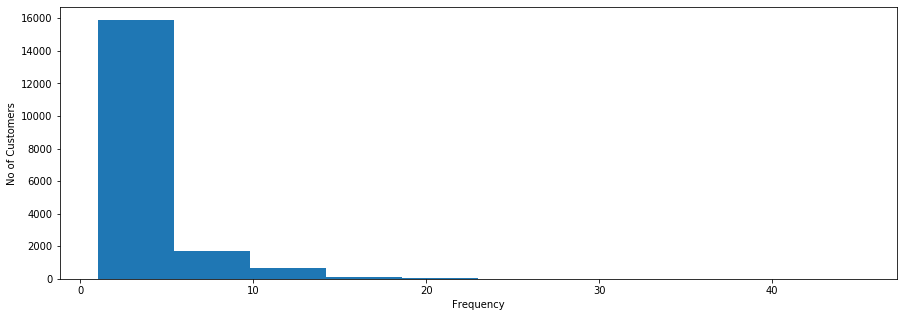

In [13]:
# Plotting histogram for Frequency variable

plt.figure(figsize=(15,5))
plt.hist(customer_df.frequency)
plt.xlabel('Frequency')
plt.ylabel('No of Customers')

Text(0, 0.5, 'No of Customers')

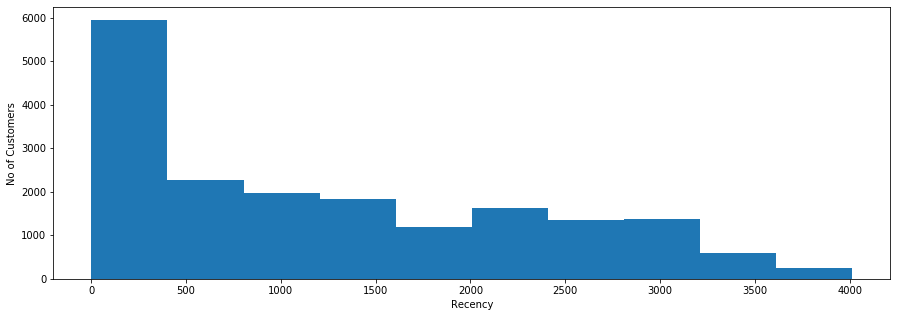

In [14]:
# Plotting histogram for Recency variable

plt.figure(figsize=(15,5))
plt.hist(customer_df.recency)
plt.xlabel('Recency')
plt.ylabel('No of Customers')

Text(0, 0.5, 'No of Customers')

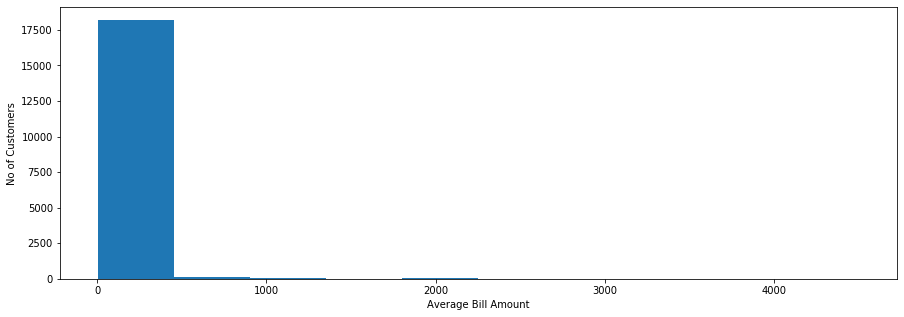

In [15]:
# Plotting histogram for the Average purchase amount

plt.figure(figsize=(15,5))
plt.hist(customer_df.avg_purchase_amt)
plt.xlabel('Average Bill Amount')
plt.ylabel('No of Customers')

Text(0, 0.5, 'No of Customers')

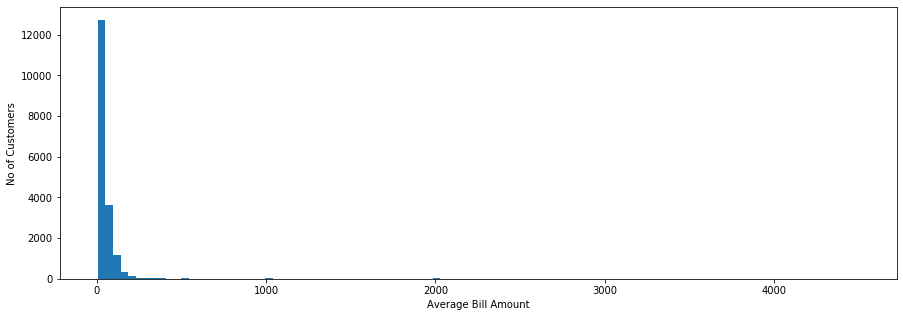

In [16]:
# Creating bins to plot histogram of Average purchase amount 

plt.figure(figsize=(15,5))
plt.hist(customer_df.avg_purchase_amt, bins=100)
plt.xlabel('Average Bill Amount')
plt.ylabel('No of Customers')

In [17]:
# Normalizing the data. as the data is right skewed for the average purchase amount

customer_df.avg_purchase_amt = np.log(customer_df.avg_purchase_amt)

Text(0, 0.5, 'No of Customers')

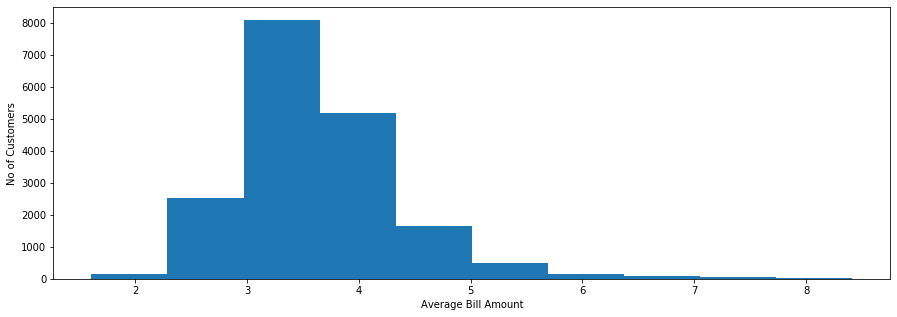

In [18]:
# Plotting histogram for avaerge purchase amount after normalizing the data 

plt.figure(figsize=(15,5))
plt.hist(customer_df.avg_purchase_amt)
plt.xlabel('Average Bill Amount')
plt.ylabel('No of Customers')

In [19]:
# Dropping the customer_id column 

customer_df.drop(columns=['customer_id'], axis=1, inplace=True)
cols = customer_df.columns

In [20]:
# Standardizinf the data because the values in each feature are on different scales

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)
for num in np.arange(customer_df.shape[1]):
    customer_df.iloc[:,num] = scaled_data[:,num]

In [21]:
customer_df.head()

,frequency,recency,avg_purchase_amt
0,-0.606909,2.382043,-0.235802
1,1.436125,-0.841530,0.894386
2,2.457642,-0.457771,1.523861
3,-0.606909,0.136824,-0.764046
4,-0.266403,1.587709,0.429707


In [22]:
# After analysing, 5 cluster solution is more meaningful than 6 cluster.
# Initializing KMeans algorithm and fitting

kmeans_5 = KMeans(n_clusters=5, random_state=100).fit(customer_df)

In [23]:
# Predicting

predicted_5 = kmeans_5.predict(customer_df)

In [24]:
# Scaling back the data to it's original form

customer_df = scaler.inverse_transform(customer_df)

In [25]:
customer_df = pd.DataFrame(customer_df, columns=cols)

In [26]:
customer_df.avg_purchase_amt = np.exp(customer_df.avg_purchase_amt)
customer_df.head()

,frequency,recency,avg_purchase_amt
0,1.0,3829.0,30.000000
1,7.0,343.0,71.428571
2,10.0,758.0,115.800000
3,1.0,1401.0,20.000000
4,2.0,2970.0,50.000000


In [27]:
customer_df_5 = customer_df.copy(deep=True)

In [28]:
# Mapping cluster ID to each customer

customer_df_5['cluster_ID'] = pd.Series(predicted_5, index=customer_df_5.index)

In [29]:
customer_df_5.head()

,frequency,recency,avg_purchase_amt,cluster_ID
0,1.0,3829.0,30.000000,2
1,7.0,343.0,71.428571,1
2,10.0,758.0,115.800000,1
3,1.0,1401.0,20.000000,0
4,2.0,2970.0,50.000000,2


In [30]:
# Grouping by the cluster_ID to get the cluster charateristics

customer_df_new = customer_df_5.groupby(['cluster_ID']).agg({'frequency':'mean','recency':'mean','avg_purchase_amt':'median'}).reset_index()

In [31]:
# Calculating the cluster size  

unique, counts = np.unique(predicted_5, return_counts=True)
dict(zip(unique, counts))

{0: 5532, 1: 2186, 2: 5772, 3: 647, 4: 4280}

In [32]:
# Mapping the cluster size to the each cluster 

customer_df_new["cluster_size"] = pd.Series(counts,index=customer_df_new.index)

In [33]:
customer_df_new.head()

,cluster_ID,frequency,recency,avg_purchase_amt,cluster_size
0,0,2.021692,692.078091,26.666667,5532
1,1,9.233760,306.005489,40.000000,2186
2,2,1.506584,2606.617117,30.000000,5772
3,3,2.916538,1031.744977,265.000000,647
4,4,2.170794,669.804206,60.000000,4280


In [34]:
# Calculating revenue for each cluster 

customer_df_new["revenue"]= customer_df_new.frequency*customer_df_new.avg_purchase_amt*customer_df_new.cluster_size

In [35]:
customer_df_new.head()

,cluster_ID,frequency,recency,avg_purchase_amt,cluster_size,revenue
0,0,2.021692,692.078091,26.666667,5532,298240.0
1,1,9.233760,306.005489,40.000000,2186,807400.0
2,2,1.506584,2606.617117,30.000000,5772,260880.0
3,3,2.916538,1031.744977,265.000000,647,500055.0
4,4,2.170794,669.804206,60.000000,4280,557460.0


# Inferences and Proposed Marketing Actions

1. **Cluster: 0, 1, 4** are found to be important clusters.
2. **Cluster: 0** is found to be useful because of the good cluster size, recency of the customers is less then 2 years and generating revenue of 298240.
3. **Cluster: 1** is found to be useful because recency of the customers is less than 1 year, generating revenue of 807400 and also loyal customers because the frequency is also high.
4. **Cluster: 4** is found to be useful because average monetary value is high for each customer, good cluster size and recency of the customers is less then 2 years
5. **Cluster: 2, 3** are not useful because the recency of the customer are almost 8 years and more than 3 years respectively.

Since we are constrained in selecting only 2 clusters. We are selecting **Cluster 1 and 4** 

**Proposed marketing action for cluster 1**

1. Use Market Basket Analysis to recommend new product.
2. To increase the frequency, we can give discount coupons that will be valid for some time and can be redeemed during their next visit.
3. Create recommendation system in which we will give credit in the form of referral coupons so that the customer bring new customers.

**Proposed marketing action for cluster 4**

1. we can take feedback from the customers and try to understand what makes them to churn so according to that we will give strategized personalized coupons and discounts to bring them back.
2. According to past purchase history we can recommend new items with attractive discount.
3. Keep customer updated about new product range addition by personalized mail and messages.

=========================================================================================================================

**Task 2**<br><br>

Using R, F, M try building segments which are more from the managerial implementation angle and common-sense-led actionable. For example, (i) by giving scores based on R, F, M and creating a score for each customer and then segmenting them OR (ii) by creating two groups High / Low for each of the variables R, F and M and then looking at the all possible 2X2X2 = 8 segments. Select the two most important segments for this business to act upon. Why do you think these two segments are important? What Marketing actions do you propose to take, to target and derive more business from these two segments?

In [58]:
# Craeting a copy of original purchase dataframe to use for task 2

purchases_df_2 = purchases_df.copy(deep=True)

In [59]:
# Calculating R F M and first purchase of the customer from the purchase dataframe 

frequency = purchases_df_2.groupby(['customer_id']).size().to_frame('frequency').reset_index()
recency_amt = purchases_df_2.groupby(['customer_id']).agg({'days_since':min,'purchase_amt':'mean'}).reset_index()
first_purchase=purchases_df_2.groupby(["customer_id"]).agg({'days_since':max}).reset_index()
first_purchase.rename(columns={"days_since":"first_purchase"},inplace=True)
recency_amt.rename(columns={'days_since':'recency', 'purchase_amt':'avg_purchase_amt'}, inplace = True)

In [60]:
# Merging the R F M values which was calculated seperately

temp = pd.merge(frequency, recency_amt, on='customer_id')
customer_df_1 = pd.merge(temp,first_purchase,on="customer_id")

In [61]:
customer_df_1.head()

,customer_id,frequency,recency,avg_purchase_amt,first_purchase
0,10,1,3829,30.000000,3829
1,80,7,343,71.428571,3751
2,90,10,758,115.800000,3783
3,120,1,1401,20.000000,1401
4,130,2,2970,50.000000,3710


In [62]:
# Creating new column segment and filling the values with NA

customer_df_1["segment"] = "NA"

In [63]:
# Segmenting customers based on the rules defined 

customer_df_1.loc[customer_df_1.recency >= (365*3), 'segment'] = 'inactive'
customer_df_1.loc[(customer_df_1.recency <=(365*3)) & (customer_df_1.recency > (365*2)), 'segment'] = "cold"
customer_df_1.loc[(customer_df_1.recency <=(365*2)) & (customer_df_1.recency > (365*1)), 'segment'] = "warm"
customer_df_1.loc[customer_df_1.recency <=365, 'segment'] = "active"

In [64]:
# Checking the count of customer in each segment 

customer_df_1.segment.value_counts()

inactive    9158
active      5398
warm        1958
cold        1903
Name: segment, dtype: int64

In [65]:
# Creating new dataframe with only active and warm customers.

customer_new = customer_df_1[(customer_df_1.segment=="active") | (customer_df_1.segment=="warm")]

In [66]:
customer_new.describe()

,customer_id,frequency,recency,avg_purchase_amt,first_purchase
count,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000
mean,169872.315117,4.111338,203.602773,71.410500,1426.914220
std,75878.952350,3.808785,200.928740,192.258907,1223.260045
min,80.000000,1.000000,1.000000,5.000000,1.000000
25%,110617.500000,1.000000,34.000000,29.000000,413.000000
50%,192495.000000,3.000000,108.000000,38.000000,1040.000000
75%,230182.500000,6.000000,366.000000,60.000000,2568.000000
max,264200.000000,45.000000,720.000000,4500.000000,4012.000000


# Rules defined to create segments

Scale of **1 to 5** is considered to score the customer for .

**5** being the highest score and **1** being the lowest score 

**Rules for Recency:**

1. Customers who are have recency less than **8 months** are scored **5**
2. Customers having recency between **8 to 12 months** are scored **4**
3. Customers having recency between **12 to 16 months** are scored **3**
4. Customers having recency between **16 to 20 months** are scored **2**
5. Customers having recency **>20** are scored **1**
<br>

**Rules for Frequency:**

1. Customers having frequency greater than **9** are scored **5**
2. Customers having frequency between **6 to 8** are scored **4**
3. Customers having frequency **4 and 5** are scored **3**
4. Customers having frequency **2 and 3** are scored **2**
5. Customers having frequency **1** are scored **1**
<br>

**Rules for Monetary Value:**

1. Customers having average purchase amount **>100** are scored **5**
2. Customers having average purchase amount between **60 to 100** are scored **4**
3. Customers having average purchase amount between **40 to 60** are scored **3**
4. Customers having average purchase amount between **20 to 40** are scored **2**
5. Customers having average purchase amount **<20** are scored **1**

In [71]:
# Scoring the Recency of each customer 

customer_new["recency_score"] = customer_new.recency
recency_bins = [1,240,365,480,600,np.inf]
recency_values = [5,4,3,2,1]
customer_new["recency_score"] = pd.cut(customer_new["recency_score"], bins = recency_bins, labels = recency_values, include_lowest=True, right=False)

In [72]:
# Scoring the Frequency of each customer 

customer_new["frequency_score"] = customer_new.frequency
frequency_bins = [0,1,3,5,8,np.inf]
frequency_values = [1,2,3,4,5]
customer_new["frequency_score"] = pd.cut(customer_new["frequency_score"], bins = frequency_bins, labels = frequency_values, include_lowest=True, right=False)

In [73]:
# Scoring the Monetary value of each customer 

customer_new["money_score"] = customer_new.avg_purchase_amt
money_bins = [0,20,40,60,100,np.inf]
money_values = [1,2,3,4,5]
customer_new["money_score"] = pd.cut(customer_new["money_score"], bins = money_bins, labels = money_values, include_lowest=True, right=False)

In [74]:
# Calculating the total score for each customer 

customer_new["total_score"] = customer_new["recency_score"].astype(int)+customer_new["frequency_score"].astype(int)+customer_new["money_score"].astype(int)

In [75]:
customer_new.head()

,customer_id,frequency,recency,avg_purchase_amt,first_purchase,segment,recency_score,frequency_score,money_score,total_score
1,80,7,343,71.428571,3751,active,4,4,4,12
9,240,4,463,16.250000,3815,warm,3,3,1,7
17,480,12,21,60.833333,3678,active,5,5,4,14
29,830,7,321,48.571429,3739,active,4,4,3,11
30,850,10,24,28.500000,3416,active,5,5,2,12


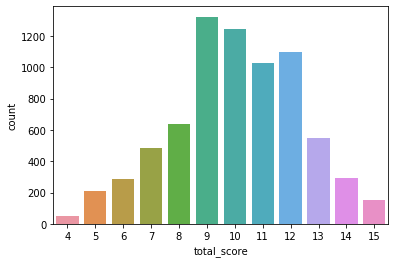

In [76]:
# Plotting count of customers with respective to scores

sns.countplot(customer_new.total_score)

In [77]:
# Segmenting customers based on the scores 

customer_new.drop("segment",axis=1,inplace=True)
customer_new["segment"] = customer_new.total_score
total_score_bins = [4,6,8,10,12,15]
total_score_values = ["seg1","seg2","seg3","seg4","seg5"]
customer_new["segment"] = pd.cut(customer_new["segment"], bins = total_score_bins, labels = total_score_values, include_lowest=True, right=False)

In [78]:
# Calculating the representative characteristics of each segments 

cust_final=customer_new.groupby("segment").agg({"frequency":"mean","recency":"mean","avg_purchase_amt":"median"}).reset_index()

In [79]:
# Calculating the size of each segment 

customer_new["segment"].value_counts(ascending=True)

seg1     261
seg2     776
seg5    1938
seg3    1961
seg4    2270
Name: segment, dtype: int64

In [80]:
# Adding the segment size in the dataframe

cust_final["seg_size"]=pd.Series([261,776,1961,2270,1938])

In [82]:
# Revenue for each segments is calculated

cust_final["revenue"] = cust_final["avg_purchase_amt"]*cust_final["seg_size"]*cust_final["frequency"]
cust_final.head()

,segment,frequency,recency,avg_purchase_amt,seg_size,revenue
0,seg1,1.226054,629.831418,30.0,261,9600.0
1,seg2,1.717784,493.192010,30.0,776,39990.0
2,seg3,2.225395,225.328914,30.0,1961,130920.0
3,seg4,4.051101,145.770485,40.0,2270,367840.0
4,seg5,6.956140,87.749742,70.0,1938,943670.0


# Inferences and Marketing Actions

1. High Valued Premium Customers (seg 5 ) -These are the high spending frequent customers we need to maintain a very friendly relationship with these customers and the individual preferences should be given weightage. Personalized offers need to be sent out to this cluster of customers.
2. Low spending Loyal active customers (seg 4 and 3 ) - We need to try to upsell to these customers by either providing them personlized offers or expanding their buying options.